# HSE 2023: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [1]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/dataset/241/one+hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [2]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [3]:
import numpy as np

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [5]:
le = LabelEncoder()
y = le.fit_transform(y_name)

Split your data into **train** and **test** keeping 30% for the test.

In [6]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix

In [7]:
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.7f}")
print(f"F1 Score: {f1:.7f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8062500
F1 Score: 0.8035514
Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 6]]


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

In [8]:
pca = PCA(n_components=2, random_state=1)
X_pca = pca.fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

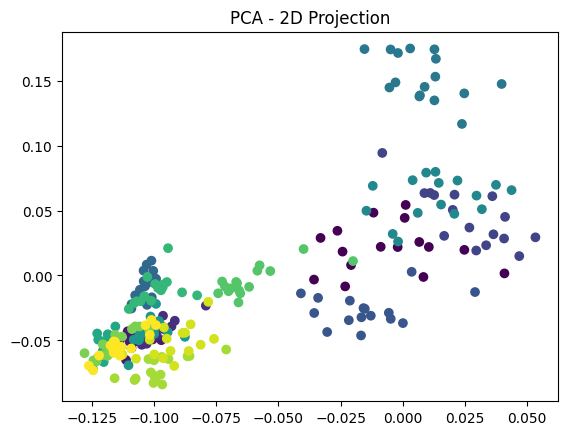

In [9]:
plt.scatter(X_pca[y<=15, 0], X_pca[y<=15, 1], c=y[y<=15])
plt.title('PCA - 2D Projection')
plt.show()

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

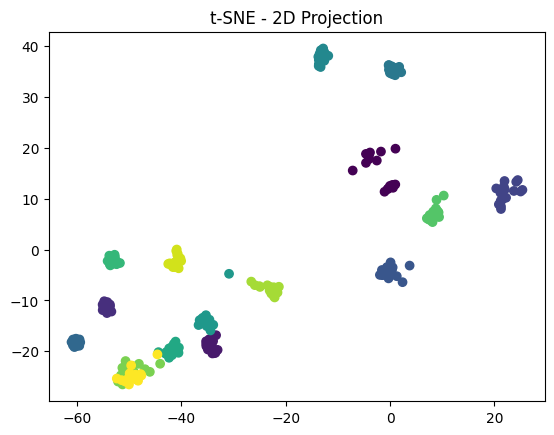

In [10]:
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[y<=15, 0], X_tsne[y<=15, 1], c=y[y<=15])
plt.title('t-SNE - 2D Projection')
plt.show()

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [11]:
cords_2_tsne = X_tsne[2, :].round(decimals=2)

print(f"Coordinates of object with index 2 after t-SNE: {cords_2_tsne}")

Coordinates of object with index 2 after t-SNE: [ 0.57 12.13]


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [12]:
cords_2_pca = X_pca[2, :].round(decimals=2)

print(f"Coordinates of object with index 2 after PCA: {cords_2_pca}")

Coordinates of object with index 2 after PCA: [-0.03  0.03]


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

***3** Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable.*

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [13]:
# Let's use PCA as the best feature representation
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM with linear kernel using the transformed data
svm_model_pca = SVC(kernel='linear', random_state=1)
svm_model_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = svm_model_pca.predict(X_test_pca)

# Calculate metrics for PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print("Metrics for PCA:")
print(f"Accuracy: {accuracy_pca:.7f}")
print(f"F1 Score: {f1_pca:.7f}")
print("Confusion Matrix:")
print(conf_matrix_pca)

Metrics for PCA:
Accuracy: 0.2416667
F1 Score: 0.1921443
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


Показатели катастрофичекски ухудшились. // FIXME?

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [34]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        # Calculate new cluster centers as the mean of points assigned to each cluster
        centers = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return centers
    
    def update_labels(self, X):
        # Calculate the index of the nearest cluster center for each point
        labels = pairwise_distances_argmin(X, self.centers)
        return labels 

    def fit(self, X, plot_iterations=False):
        # Initialize cluster centers randomly and assign labels based on the initial centers
        self.centers = X[np.random.choice(range(len(X)), size=self.n_clusters, replace=False)]
        self.labels = self.update_labels(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels

                if plot_iterations:
                    print('Converge by tolerance centers')
                    fig, ax = plt.subplots(1,1)
                    plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            if plot_iterations:
                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                plt.pause(0.3);
                clear_output(wait=True);
        

        return 1
    
    def predict(self, X):
        # Predict labels based on the nearest cluster centers
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

Generating data for clustering

In [35]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [36]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)** 

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

Result label for object with index 0: 0


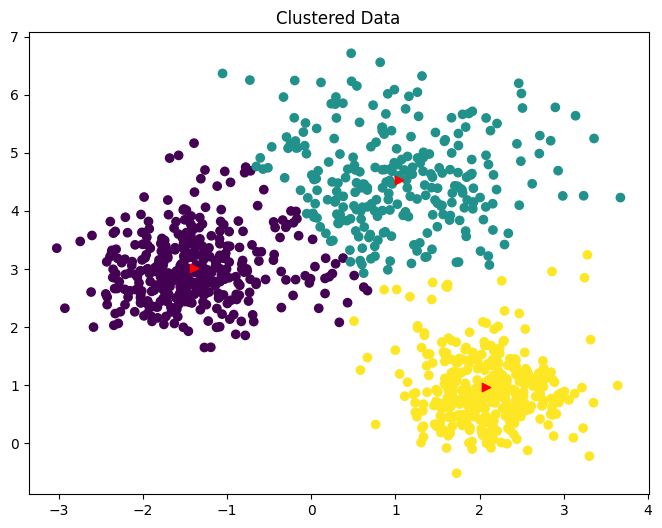

In [37]:
my_kmeans_3 = MyKMeans(n_clusters=3, n_iters=3)
converged_3 = my_kmeans_3.fit(X)

# Plot the result
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_clust(X, my_kmeans_3.centers, my_kmeans_3.labels, ax)
ax.set_title('Clustered Data')

# Specify the result label for the object with index 0
result_label_index_0 = my_kmeans_3.predict(X[0].reshape(1, -1))[0]
print(f"Result label for object with index 0: {result_label_index_0}")

7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Result label for object with index 0: 0


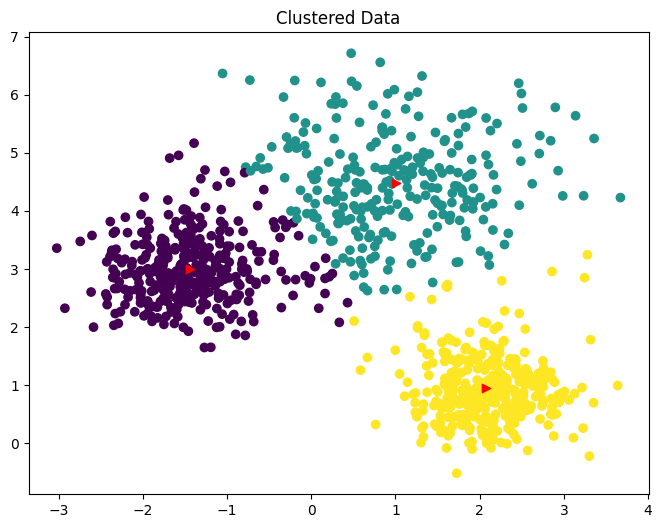

In [38]:
my_kmeans_100 = MyKMeans(n_clusters=3, n_iters=100)
converged_100 = my_kmeans_100.fit(X)

# Plot the result
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_clust(X, my_kmeans_100.centers, my_kmeans_100.labels, ax)
ax.set_title('Clustered Data')

# Specify the result label for the object with index 0
result_label_index_0 = my_kmeans_100.predict(X[0].reshape(1, -1))[0]
print(f"Result label for object with index 0: {result_label_index_0}")

7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [41]:
labels_3_iters = my_kmeans_3.predict(X)
labels_100_iters = my_kmeans_100.predict(X)

# Count the number of objects that changed their predicted cluster label
changed_labels_count = np.sum(labels_3_iters != labels_100_iters)
print(f"Number of objects that changed label: {changed_labels_count}")

Number of objects that changed label: 4


**Task 8. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

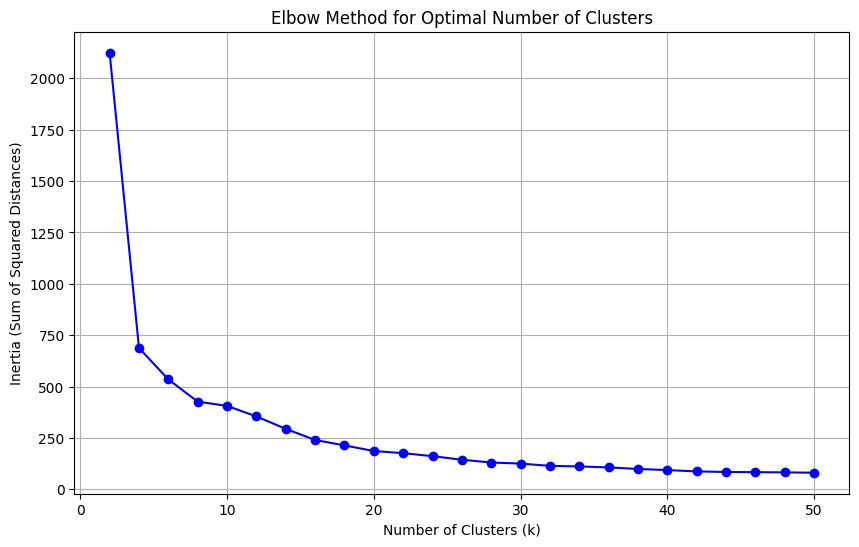

In [42]:
inertia_values = []

for k in range(2, 51, 2):
    my_kmeans = MyKMeans(n_clusters=k, n_iters=100)
    my_kmeans.fit(X)

    # Calculate the inertia (sum of squared distances) and append the inertia to the list
    inertia = np.sum((X - my_kmeans.centers[my_kmeans.labels]) ** 2)
    inertia_values.append(inertia)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 51, 2), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

Response for object with index 2: 0


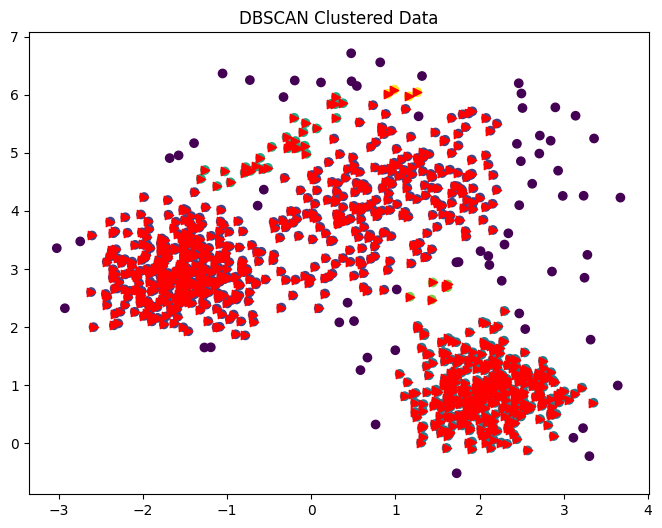

In [43]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.3)
dbscan_labels = dbscan_model.fit_predict(X)

# Plot the result
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_clust(X, X[dbscan_model.labels_ != -1], dbscan_labels, ax)  # Ignore noise points (label=-1)
ax.set_title('DBSCAN Clustered Data')

# Specify the response for the object with index 2
response_index_2 = dbscan_labels[2]
print(f"Response for object with index 2: {response_index_2}")

**Task 10. <a id="task8"></a> (1 point)** 

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

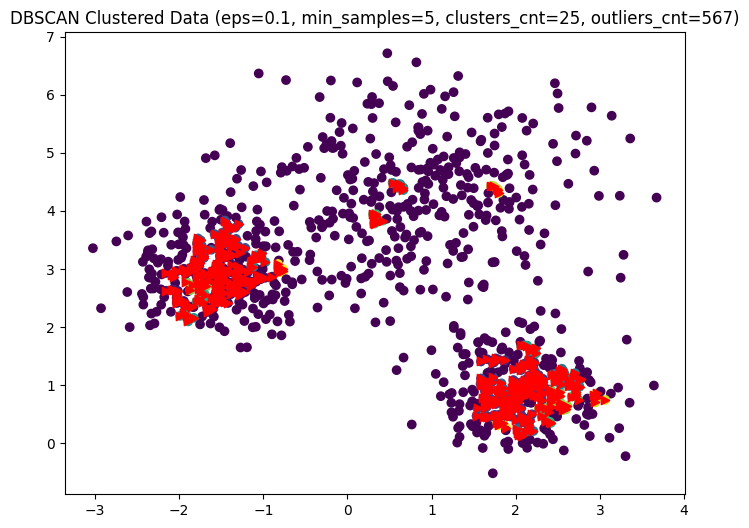

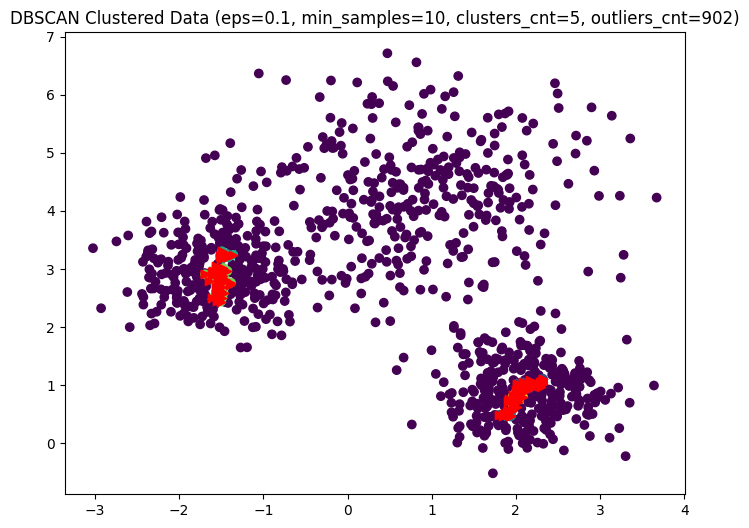

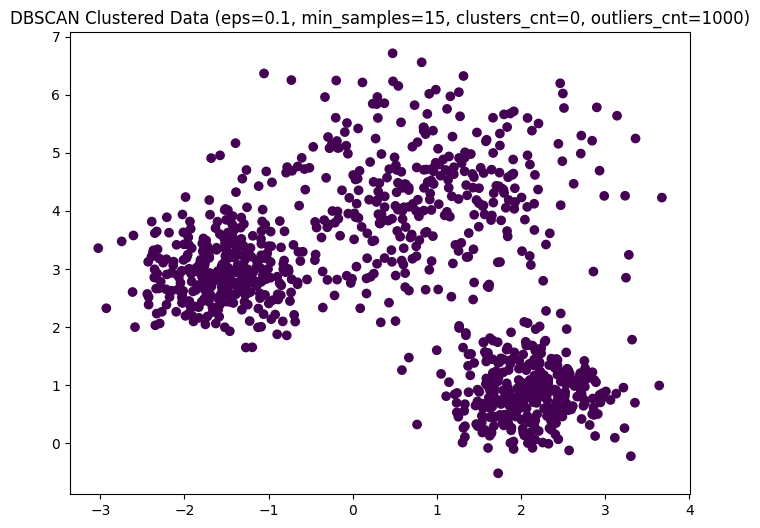

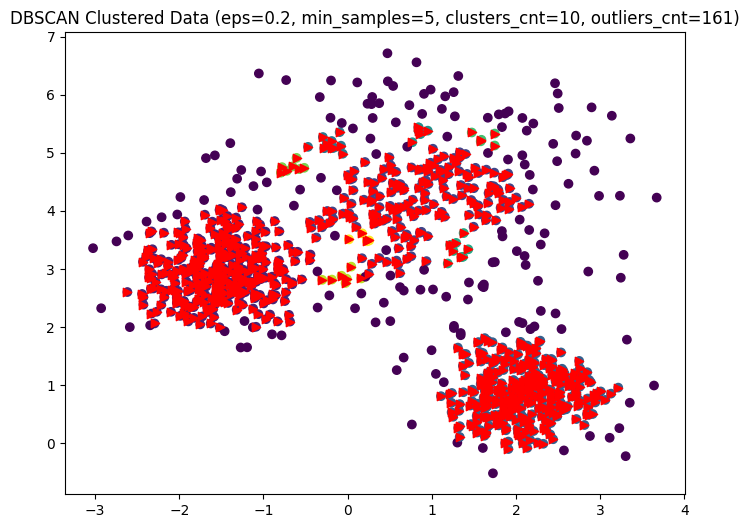

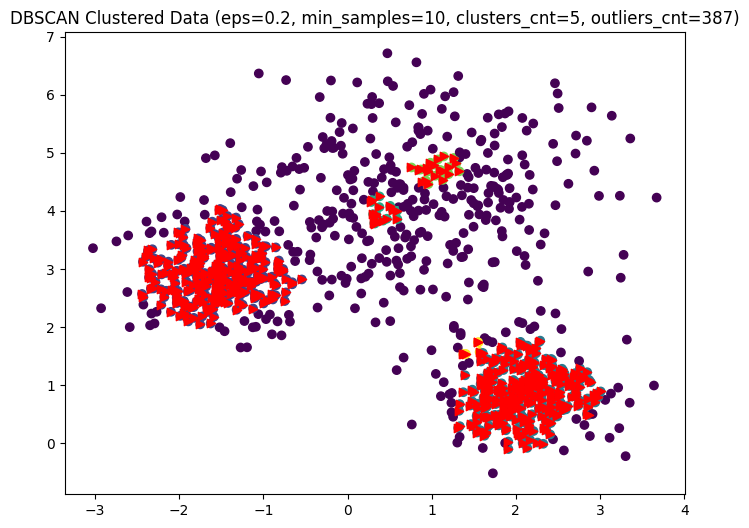

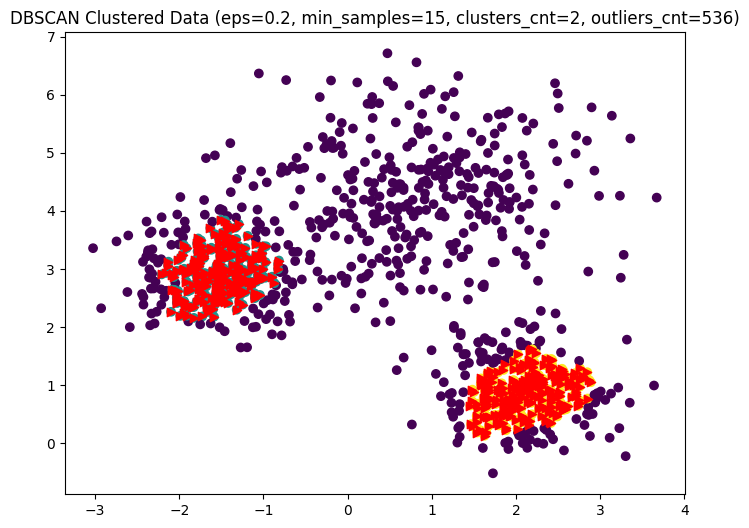

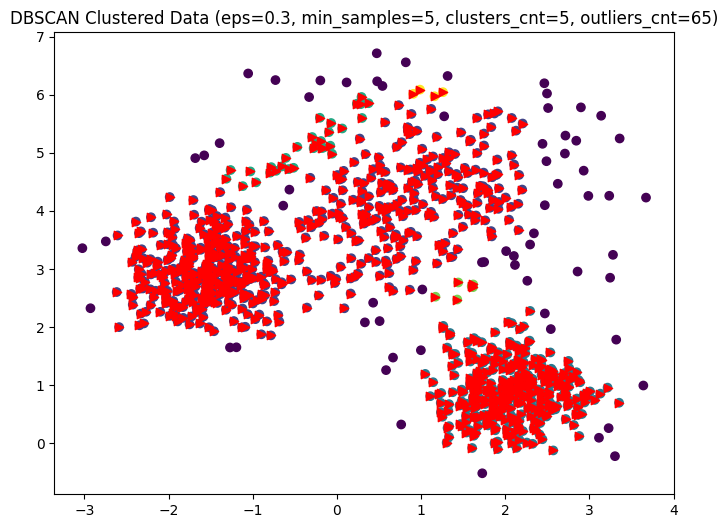

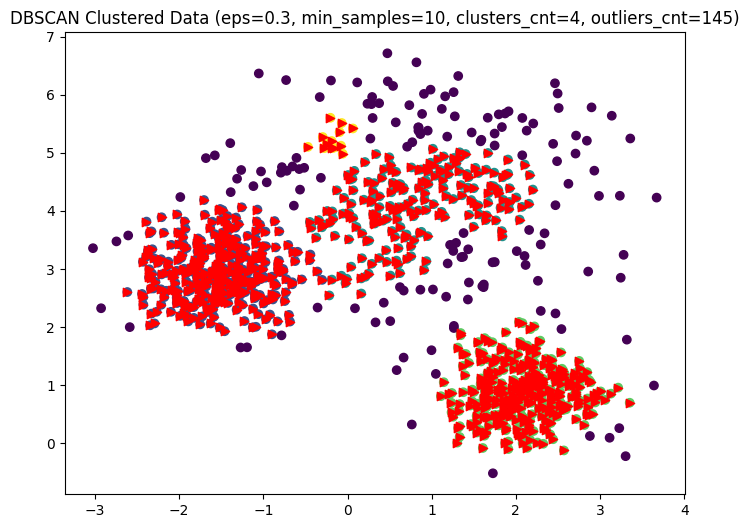

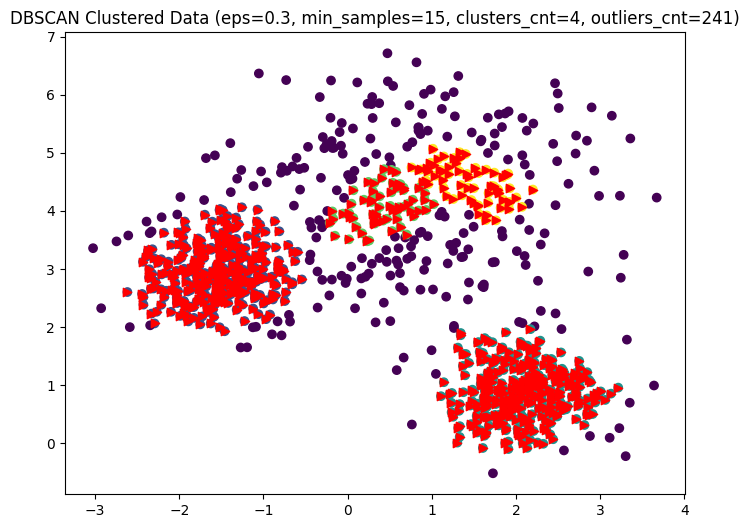

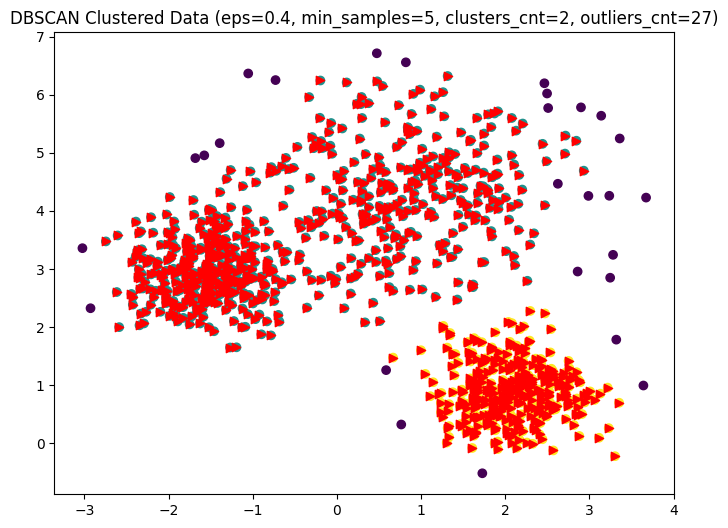

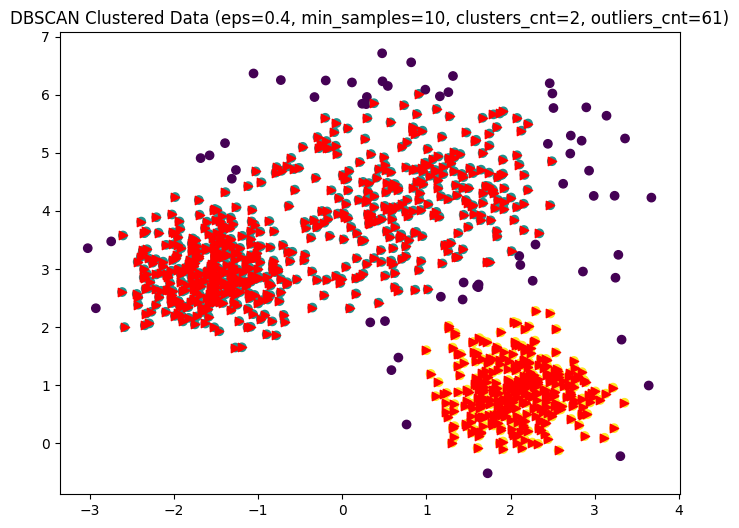

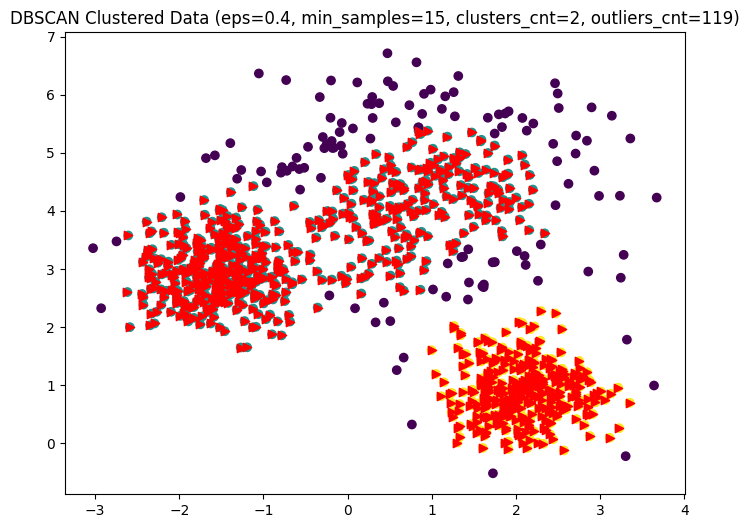

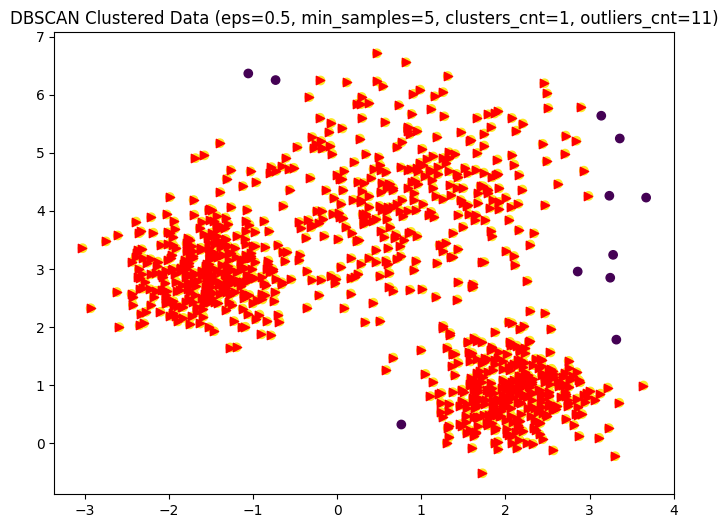

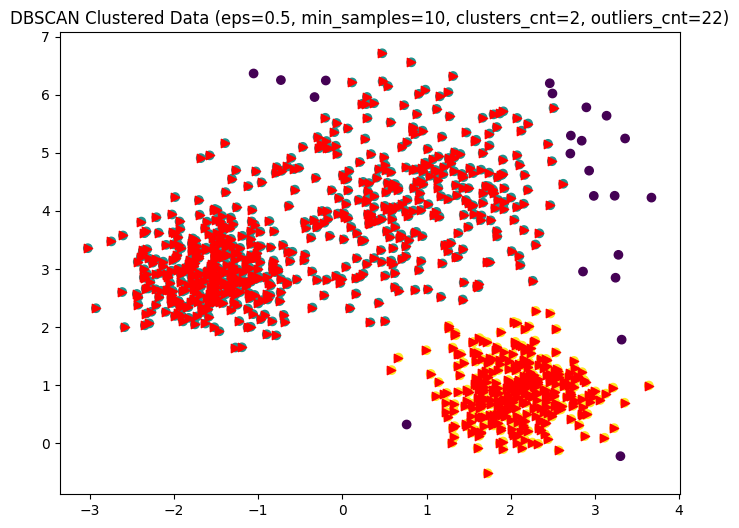

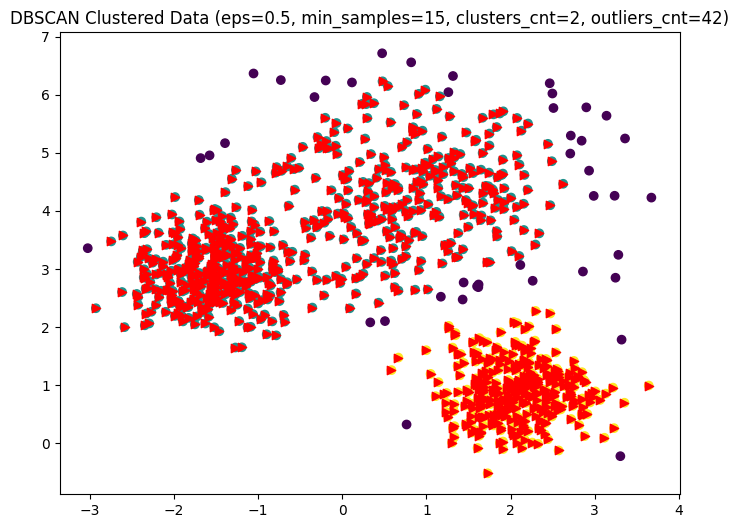

In [46]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(X)

        # Count the number of clusters and outliers
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_outliers = np.sum(dbscan_labels == -1)

        # Plot the result
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        plot_clust(X, X[dbscan_labels != -1], dbscan_labels, ax)  # Ignore noise points (label=-1)
        ax.set_title(f'DBSCAN Clustered Data (eps={eps}, min_samples={min_samples}, clusters_cnt={num_clusters}, outliers_cnt={num_outliers})')

# Display the plots
plt.show()